In [40]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = position.copy()
        self.best_value = -np.inf

class PSO:
    def __init__(self, objective_function, num_particles, max_iterations, c1, c2, w, bounds):
        self.objective_function = objective_function
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        self.c1 = c1
        self.c2 = c2
        self.w = w
        self.bounds = bounds
        self.particles = self.initialize_particles()
        self.global_best_position = None
        self.global_best_value = -np.inf
        self.gbest_history = []  

    def initialize_particles(self):
        positions = np.random.uniform(self.bounds[0], self.bounds[1], (self.num_particles, 1))
        velocities = np.zeros((self.num_particles, 1))
        return [Particle(pos, vel) for pos, vel in zip(positions, velocities)]

    def update_particles(self):
        for particle in self.particles:
            r1, r2 = np.random.rand(), np.random.rand()
            value = self.objective_function(particle.position)

            if value > particle.best_value:
                particle.best_value = value
                particle.best_position = particle.position.copy()

            if value > self.global_best_value:
                self.global_best_value = value
                self.global_best_position = particle.position.copy()

            particle.velocity = (self.w * particle.velocity +
                                 self.c1 * r1 * (particle.best_position - particle.position) +
                                 self.c2 * r2 * (self.global_best_position - particle.position))

            particle.position += particle.velocity
            particle.position = np.clip(particle.position, self.bounds[0], self.bounds[1])

        self.gbest_history.append(self.global_best_value)  # Store gbest value

    def optimize(self):
        for _ in range(self.max_iterations):
            self.update_particles()

        return self.global_best_position, self.global_best_value

def objective_function(x):
    return np.sin(x) + np.sin(x**2)

def plot_results(best_position, best_value, pso_instance):
    x = np.linspace(pso_instance.bounds[0], pso_instance.bounds[1], 100)
    y = pso_instance.objective_function(x)

    plt.figure()
    plt.plot(x, y, label='Objective Function: y = sin(x) + sin(x^2)', color='blue')
    plt.scatter(best_position.item(), best_value, color='lightblue', s=100, label=f'Optimal Solution: {best_position.item()} --- Objective Value: {best_value}')
    plt.title(f'PSO using {pso_instance.num_particles} particles')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

def plot_gbest_history(pso_instance):
    plt.figure()
    plt.plot(range(len(pso_instance.gbest_history)), pso_instance.gbest_history, color='orange', marker='o')
    plt.title('Global Best Value over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Global Best Value (gbest)')
    plt.grid()
    plt.show()

Optimal Solution (x): 1.2946711614227775 --- Objective Value (y): [1.95657202]


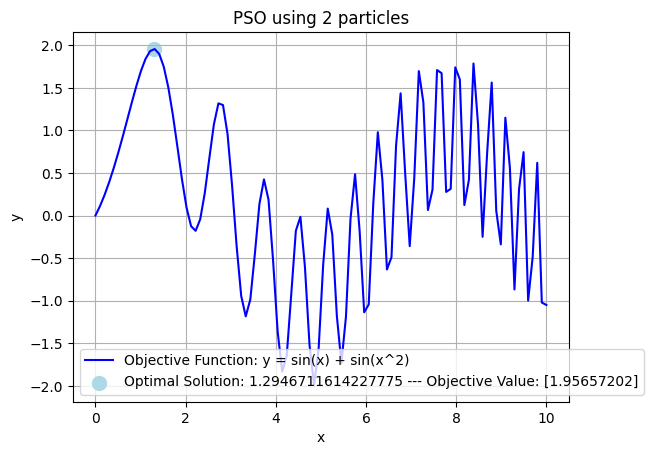

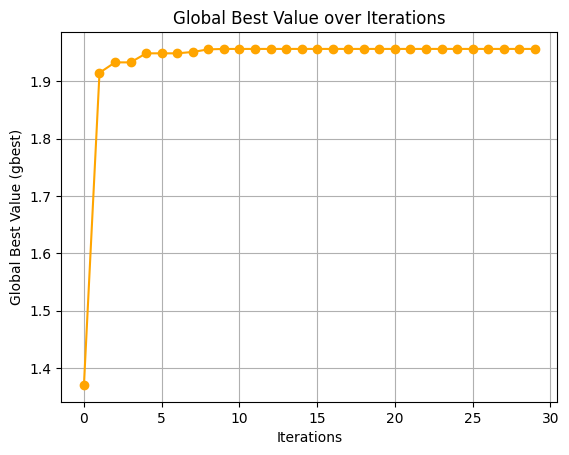

In [39]:
num_particles = 2
max_iterations = 30
c1 = 1.49
c2 = 1.49
w = 0.5
bounds = (0, 10)

pso_instance = PSO(objective_function, num_particles, max_iterations, c1, c2, w, bounds)
best_position, best_value = pso_instance.optimize()
print(f'Optimal Solution (x): {best_position.item()} --- Objective Value (y): {best_value}')

plot_results(best_position, best_value, pso_instance)
plot_gbest_history(pso_instance)